In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md


In [2]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [3]:
df = pd.read_csv('./data/2 DONE RIGHT OUTPUT Songs with lyrics.csv')
df

,song_id,chart_position,chart_debut,song,performer,lyrics
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ..."
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,’65 Love Affair LyricsI was a car hop\nYou wer...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,(Can’t Live Without Your) Love And Affection L...
...,...,...,...,...,...,...
4271,abcdefuGAYLE,3,2021-12-04,abcdefu,GAYLE,​abcdefu Lyrics[Intro]\nFuck you and your mom ...
4272,amariJ. Cole,5,2021-05-29,amari,J. Cole,"4:44 Lyrics[Paroles de ""4:44"" par. ""Apollonthe..."
4273,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,​everything i wanted Lyrics[Verse 1]\nI had a ...
4274,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"​iSpy Lyrics[Intro: KYLE & Lil Yachty]\nMan, f..."


In [4]:
df[df.song.str.contains('Rolling in the Deep', case=False)].lyrics.iloc[0]

"Rolling in the Deep Lyrics[Verse 1]\nThere's a fire starting in my heart\nReaching a fever pitch and it's bringing me out the dark\nFinally, I can see you crystal clear\nGo ahead and sell me out and I'll lay your shit bare\nSee how I'll leave with every piece of you\nDon't underestimate the things that I will do\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\n\n[Pre-Chorus]\nThe scars of your love remind me of us\nThey keep me thinkin' that we almost had it all\nThe scars of your love, they leave me breathless\nI can't help feeling\n\n[Chorus]\nWe could've had it all (You're gonna wish you never had met me)\nRolling in the deep (Tears are gonna fall, rolling in the deep)\nYou had my heart inside of your hand (You're gonna wish you never had met me)\nAnd you played it to the beat (Tears are gonna fall, rolling in the deep)\n\n[Verse 2]\nBaby, I have no story to be told\nBut I've heard one on you, now I'm gonna make your head burn\nThink 

# Explode data into *one row per line*

In [5]:
lyrics_split_df = df.copy()
lyrics_split_df['Parsed Lyrics'] = df.lyrics.apply(lambda l: l.split('\n'))

every_row_is_a_line_RAW = lyrics_split_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'song_id']
).drop(
    columns=['lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'}).reset_index()


In [6]:
every_row_is_a_line_RAW

,index,song_id,chart_position,chart_debut,song,performer,lyric_line
0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1]
1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,So long ago
2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Was it in a dream, was it just a dream?"
3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"I know, yes I know"
4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...
166642,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,No!
166643,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Right
166644,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Life can bring much pain
166645,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,There are many ways to deal with this pain (ri...


### Filter & clean

In [7]:
# SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"
SONG_DASH_ARTIST = ' - '  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

# regex is easiest
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"


with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        ENDS_WITH_YEAR_IN_PAREN, 
        regex= True, case=False, na=False
    )
]

with_filters = with_filters[
    ~with_filters['lyric_line'].str.contains(
        SONG_DASH_ARTIST
    )
]


# remove if starts *or* ends with "[]": ~20k
# NOTE: I checked this fairly thoroughly, this condition signals a non-lyric
with_filters = with_filters[
        ~with_filters.lyric_line.str.startswith('[') &
        ~with_filters.lyric_line.str.endswith(']')
]


# all we need, not too many verses in these songs :P 
with_filters = with_filters[
        ~with_filters.lyric_line.str.contains('Verse 1') &
        ~with_filters.lyric_line.str.contains('Verse 2') &
        ~with_filters.lyric_line.str.contains('Verse 3') &
        ~with_filters.lyric_line.str.contains('Verse One') &
        ~with_filters.lyric_line.str.contains('Verse Two') &
        ~with_filters.lyric_line.str.contains('Verse Three')
]

In [8]:
with_more_filters = with_filters[
    ~with_filters.lyric_line.str.contains('" by ') &
    ~with_filters.lyric_line.str.contains('EmbedShare URLCopyEmbedCopy')
].reset_index()

In [9]:
MIN_CHAR_COUNT_FOR_A_LINE = 6

In [10]:
md(f'### note: we are just going to look at lyric lines of {MIN_CHAR_COUNT_FOR_A_LINE}+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)')

### note: we are just going to look at lyric lines of 6+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)

In [11]:
with_even_more_filters = with_more_filters[
    (with_more_filters.lyric_line.str.len() >= MIN_CHAR_COUNT_FOR_A_LINE)
]

# Dealing with non-lyrics returned from the API. For the prototype: just filter them out via *character length*. Long term TODO: replace them with the correct lyrics.


In [12]:
# Reasonable?
with_even_more_filters['lyric_line'].str.len().describe()

count    139519.000000
mean         34.900623
std          16.883134
min           6.000000
25%          24.000000
50%          33.000000
75%          44.000000
max        1144.000000
Name: lyric_line, dtype: float64

In [13]:
# For context:
len("We could've had it all (tears are gonna fall, rolling in the deep)")

66

### Inspecting unusually long lyrics, they seem to be non-lyrics pretty consistently

In [14]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() > 140
]#.lyric_line.str.len().describe()

,level_0,index,song_id,chart_position,chart_debut,song,performer,lyric_line
2620,2982,73,808Blaque,8,1999-04-17,808,Blaque,"(Alright? Nah) ""That will not be in the top 10..."
4417,5029,128,"Ahab, The ArabRay Stevens",5,1962-06-30,"Ahab, The Arab",Ray Stevens,Silently through the night to the sultan's ten...
4425,5037,128,"Ahab, The ArabRay Stevens",5,1962-06-30,"Ahab, The Arab",Ray Stevens,There she was friends lying there in all her r...
7774,8909,222,Another Brick In The Wall (Part II)Pink Floyd,1,1980-01-19,Another Brick In The Wall (Part II),Pink Floyd,Other music groups and artists are mentioned w...
9046,10363,259,Baby Got BackSir Mix-A-Lot,1,1992-04-11,Baby Got Back,Sir Mix-A-Lot,"""Oh, my, god, Becky, look at her butt. It is s..."
...,...,...,...,...,...,...,...,...
135141,155627,3985,"What The World Needs Now Is Love/Abraham, Mart...",8,1971-07-10,"What The World Needs Now Is Love/Abraham, Mart...",Tom Clay,"Were at the Trademark, the motorcade is coming..."
135142,155628,3985,"What The World Needs Now Is Love/Abraham, Mart...",8,1971-07-10,"What The World Needs Now Is Love/Abraham, Mart...",Tom Clay,"Motorcade. Somethings happened here, we unders..."
135150,155642,3985,"What The World Needs Now Is Love/Abraham, Mart...",8,1971-07-10,"What The World Needs Now Is Love/Abraham, Mart...",Tom Clay,Mayor [?] has just send me a message that we'v...
135151,155644,3985,"What The World Needs Now Is Love/Abraham, Mart...",8,1971-07-10,"What The World Needs Now Is Love/Abraham, Mart...",Tom Clay,"Senator Kennedy has been, Senator Kennedy has ..."


<AxesSubplot:>

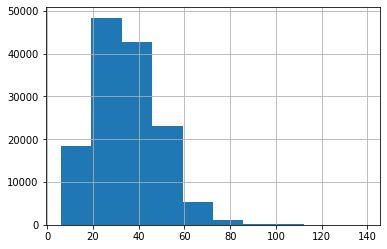

In [15]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 140
].lyric_line.str.len().hist()

## Ok, so just filter out long lines

In [16]:
with_long_lyrics_removed = with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 140
]
with_long_lyrics_removed

,level_0,index,song_id,chart_position,chart_debut,song,performer,lyric_line
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,So long ago
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Was it in a dream, was it just a dream?"
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"I know, yes I know"
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Seemed so very real, it seemed so real to me"
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,Took a walk down the street
...,...,...,...,...,...,...,...,...
144755,166640,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Out of fear I won't be free
144756,166641,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Out of fear I won't be—
144759,166644,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Life can bring much pain
144760,166645,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,There are many ways to deal with this pain (ri...


### (so we don't have to re-name stuff as we do updates)

In [17]:
filtering_done = with_long_lyrics_removed

# Add a numeric date column (for fast filtering), eg `1974-01-01` becomes something like `1974.0`

In [18]:
date_column_cast_to_datetime = pd.to_datetime(filtering_done['chart_debut'])
date_column_cast_to_datetime

0        1974-12-21
1        1974-12-21
2        1974-12-21
3        1974-12-21
5        1974-12-21
            ...    
144755   2021-05-22
144756   2021-05-22
144759   2021-05-22
144760   2021-05-22
144761   2021-05-22
Name: chart_debut, Length: 139435, dtype: datetime64[ns]

In [19]:
day_as_a_percentage = pd.to_numeric(date_column_cast_to_datetime.dt.dayofyear) / 366 # for leap years. it's ok to be a little sloppy


In [20]:
year_int = pd.to_datetime(filtering_done['chart_debut']).dt.strftime('%Y').astype(int)
year_int

0         1974
1         1974
2         1974
3         1974
5         1974
          ... 
144755    2021
144756    2021
144759    2021
144760    2021
144761    2021
Name: chart_debut, Length: 139435, dtype: int64

In [21]:
date_col_done = filtering_done.copy()
date_col_done['chart_debut_date_as_a_decimal'] = round(year_int + day_as_a_percentage, 2)
date_col_done

,level_0,index,song_id,chart_position,chart_debut,song,performer,lyric_line,chart_debut_date_as_a_decimal
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,So long ago,1974.97
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Was it in a dream, was it just a dream?",1974.97
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"I know, yes I know",1974.97
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Seemed so very real, it seemed so real to me",1974.97
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,Took a walk down the street,1974.97
...,...,...,...,...,...,...,...,...,...
144755,166640,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Out of fear I won't be free,2021.39
144756,166641,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Out of fear I won't be—,2021.39
144759,166644,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Life can bring much pain,2021.39
144760,166645,4275,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,There are many ways to deal with this pain (ri...,2021.39


# NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [22]:
COLUMNS_FOR_VIZ = ['performer', 'song', 'lyric_line', 'chart_debut', 'chart_debut_date_as_a_decimal']

lyric_lines_ready_for_analysis = (
    date_col_done[
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val and val.replace('â\x80\x99', "'")
)
lyric_lines_ready_for_analysis

,performer,song,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,John Lennon,#9 Dream,So long ago,1974-12-21,1974.97
1,John Lennon,#9 Dream,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,John Lennon,#9 Dream,"I know, yes I know",1974-12-21,1974.97
3,John Lennon,#9 Dream,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,John Lennon,#9 Dream,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...
139430,J. Cole,interlude,Out of fear I won't be free,2021-05-22,2021.39
139431,J. Cole,interlude,Out of fear I won't be—,2021-05-22,2021.39
139432,J. Cole,interlude,Life can bring much pain,2021-05-22,2021.39
139433,J. Cole,interlude,There are many ways to deal with this pain (ri...,2021-05-22,2021.39


### Lyric lines by year (sanity check)

<AxesSubplot:>

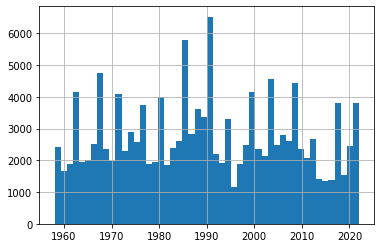

In [23]:
lyric_lines_ready_for_analysis.chart_debut.apply(lambda d: int(d[:4])).hist(bins=50)

In [24]:
lyric_lines_ready_for_analysis.to_csv('./data/3 DONE RIGHT OUTPUT One lyric lines per row, cleaned.csv', index=False)